In [86]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('heart_disease_dataset.csv')
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon,Georeference
0,2020,AK,Denali,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,348.8,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Male,Race/Ethnicity,White,T2,2068,63.678820,-149.960801,POINT (-149.9608012 63.67881971)
1,2020,CA,California,State,NVSS,Cardiovascular Diseases,Heart Disease Mortality,230.1,"per 100,000 population","Age-adjusted, 3-year Average Rate",...,NaN,Sex,Male,Race/Ethnicity,More than one race,T2,6,37.241400,-119.601000,POINT (-119.601 37.2414)
2,2020,CO,Park County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,135.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,White,T2,8093,39.115616,-105.708698,POINT (-105.7086982 39.11561621)
3,2020,FL,Walton County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,126.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,Asian,T2,12131,30.655966,-86.157457,POINT (-86.15745736 30.65596581)
4,2020,GA,Whitfield County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,155.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,NaN,Sex,Female,Race/Ethnicity,Hispanic,T2,13313,34.803854,-84.962112,POINT (-84.96211184 34.80385386)


In [87]:
essential_columns = ["Year", "LocationDesc", "Stratification1", "Stratification2"]
df_cleaned = df.dropna(subset=essential_columns)

In [88]:
df_cleaned["Data_Value"].fillna(df_cleaned["Data_Value"].median(), inplace=True)


<ipython-input-88-4c8825a7eaa9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Data_Value"].fillna(df_cleaned["Data_Value"].median(), inplace=True)


In [89]:
categorical_columns = ["LocationAbbr", "LocationDesc", "GeographicLevel", "DataSource",
                       "Class", "Topic", "Data_Value_Unit", "Data_Value_Type",
                       "StratificationCategory1", "Stratification1",
                       "StratificationCategory2", "Stratification2"]

for col in categorical_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype("category")

In [90]:
scaler = MinMaxScaler()
numerical_columns = df_cleaned.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_columns.remove("Data_Value")  # Exclude target column from normalization

df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])


In [91]:
df_cleaned.isna().sum()

,0
Year,0
LocationAbbr,0
LocationDesc,0
GeographicLevel,0
DataSource,0
Class,0
Topic,0
Data_Value,0
Data_Value_Unit,0
Data_Value_Type,0


In [92]:
df_cleaned.drop(columns=["Data_Value_Footnote_Symbol", "Data_Value_Footnote", "Y_lat", "X_lon", "Georeference"], inplace=True)


In [93]:
df=df_cleaned

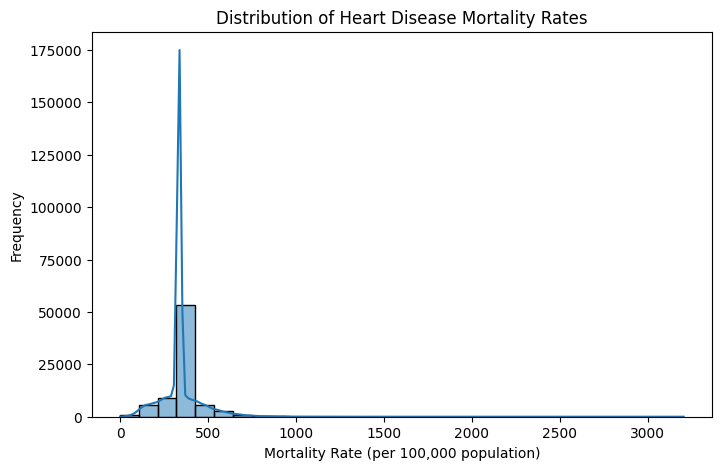

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Data_Value (Target Variable)
plt.figure(figsize=(8, 5))
sns.histplot(df["Data_Value"], bins=30, kde=True)
plt.title("Distribution of Heart Disease Mortality Rates")
plt.xlabel("Mortality Rate (per 100,000 population)")
plt.ylabel("Frequency")
plt.show()


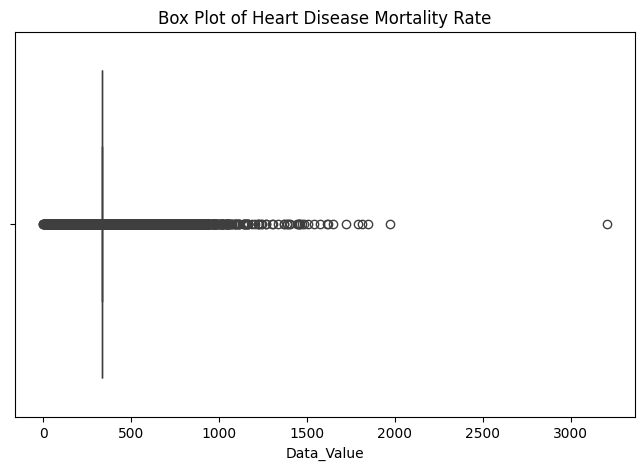

In [95]:
# Box plot for detecting outliers in Data_Value
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Data_Value"])
plt.title("Box Plot of Heart Disease Mortality Rate")
plt.show()


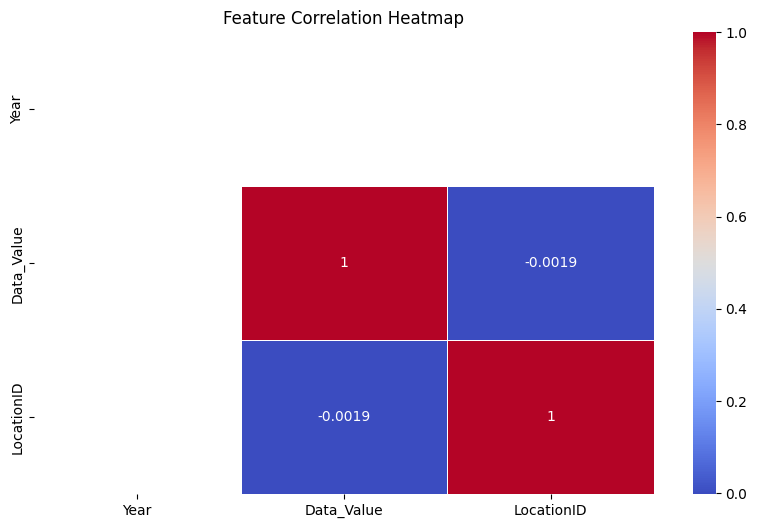

In [96]:
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-97-0fde381840cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Stratification1", data=df, palette="viridis")


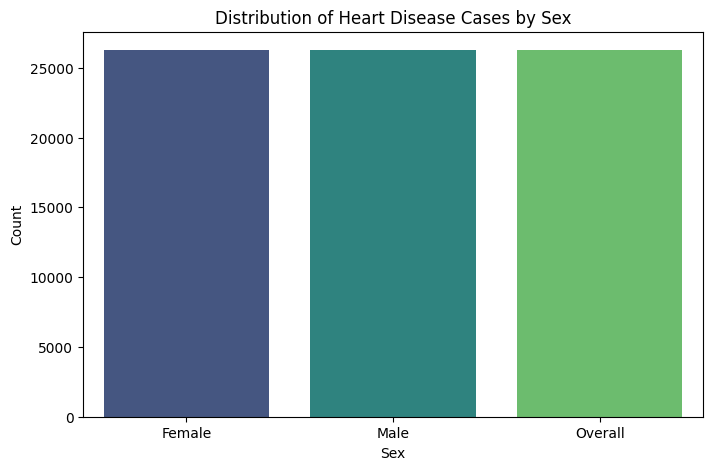

In [97]:
# Count plot for "Stratification1" (Sex)
plt.figure(figsize=(8, 5))
sns.countplot(x="Stratification1", data=df, palette="viridis")
plt.title("Distribution of Heart Disease Cases by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print(" Categorical Columns Before Encoding:", non_numeric_cols)


label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert text to numeric
    label_encoders[col] = le  # Store encoders for future use if needed

df = df.apply(pd.to_numeric, errors='coerce')  # Force convert all columns to numeric
df = df.astype(float)  # Convert everything to float

print("\n Data Types After Conversion:\n", df.dtypes)


remaining_non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print(" Categorical Columns After Encoding:", remaining_non_numeric_cols)


 Categorical Columns Before Encoding: []

 Data Types After Conversion:
 Year                       float64
LocationAbbr               float64
LocationDesc               float64
GeographicLevel            float64
DataSource                 float64
Class                      float64
Topic                      float64
Data_Value                 float64
Data_Value_Unit            float64
Data_Value_Type            float64
StratificationCategory1    float64
Stratification1            float64
StratificationCategory2    float64
Stratification2            float64
TopicID                    float64
LocationID                 float64
dtype: object
 Categorical Columns After Encoding: []


In [101]:

df = df.apply(pd.to_numeric, errors='coerce')  # Convert everything possible to numeric


missing_values_before = df.isna().sum()
print("\n Missing Values Per Column Before Fix:\n", missing_values_before[missing_values_before > 0])


for col in df.columns:
    if df[col].isna().sum() > 0:  # If NaN values exist in a column
        if df[col].notna().sum() > 0:  # If the column has at least one non-NaN value
            df[col] = df[col].fillna(df[col].mean())  # Fill with mean
        else:
            df[col] = df[col].fillna(0)  # If all values are NaN, replace with 0

missing_values_after = df.isna().sum().sum()
print("\n Missing Values After Fix:", missing_values_after)


print("\n Data Types After Conversion:\n", df.dtypes)



 Missing Values Per Column Before Fix:
 Series([], dtype: int64)

 Missing Values After Fix: 0

 Data Types After Conversion:
 Year                       float64
LocationAbbr               float64
LocationDesc               float64
GeographicLevel            float64
DataSource                 float64
Class                      float64
Topic                      float64
Data_Value                 float64
Data_Value_Unit            float64
Data_Value_Type            float64
StratificationCategory1    float64
Stratification1            float64
StratificationCategory2    float64
Stratification2            float64
TopicID                    float64
LocationID                 float64
dtype: object


Training Linear Regression...
Training Random Forest...
Training XGBoost...
Training Gradient Boosting...

 Model Performance Metrics:
                   R² Score        MAE           MSE        RMSE  Accuracy  \
Linear Regression -0.000064  57.836106  11047.565783  105.107401  0.780951   
Random Forest      0.089261  65.716009  10060.809912  100.303589  0.622248   
XGBoost            0.073690  62.204104  10232.821056  101.157407  0.627895   
Gradient Boosting  0.078111  60.465796  10183.983870  100.915727  0.629164   

                   Precision    Recall  F1 Score  
Linear Regression   0.780951  1.000000  0.877004  
Random Forest       0.863584  0.613147  0.717130  
XGBoost             0.842676  0.643699  0.729869  
Gradient Boosting   0.847885  0.639961  0.729394  


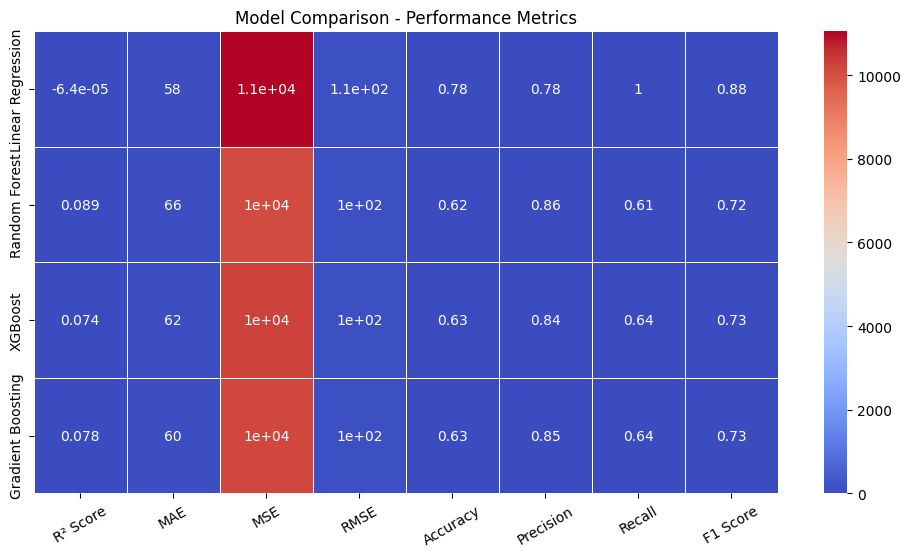

In [102]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#  Define Features (X) and Target (y)
X = df.drop(columns=["Data_Value"])  # Drop target column
y = df["Data_Value"]  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#   Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train & Evaluate Models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Regression Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Convert Regression to Classification (Threshold-Based)
    threshold = y_train.median()
    y_test_class = (y_test >= threshold).astype(int)
    y_pred_class = (y_pred >= threshold).astype(int)

    # Compute Classification Metrics
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)

    # Store results
    results[name] = {
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

#   Display Performance Metrics
results_df = pd.DataFrame(results).T
print("\n Model Performance Metrics:")
print(results_df)

#   Visualize Performance Metrics
plt.figure(figsize=(12,6))
sns.heatmap(results_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Model Comparison - Performance Metrics")
plt.xticks(rotation=30)
plt.show()


<ipython-input-103-d9fe3c2924c0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance_df["Importance"], y=rf_importance_df["Feature"], palette="Blues_r")


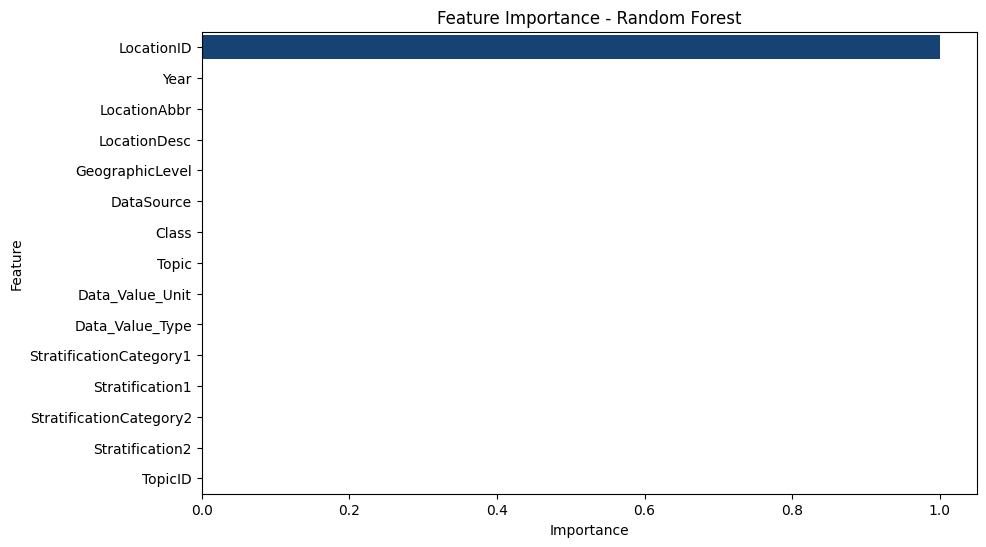

<ipython-input-103-d9fe3c2924c0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance_df["Importance"], y=xgb_importance_df["Feature"], palette="Reds_r")


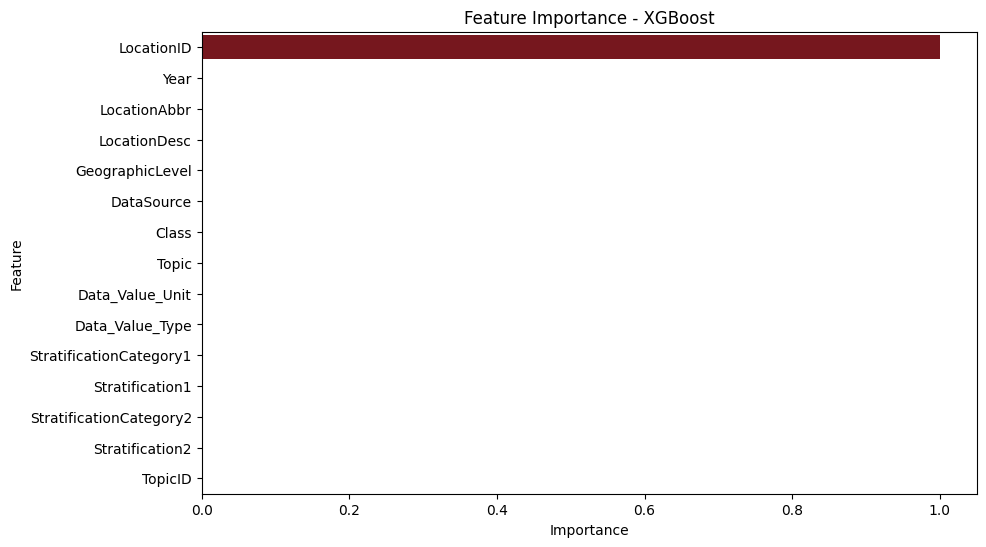

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Train Random Forest & XGBoost Models Again
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

#  Extract Feature Importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

#  Create DataFrame for Visualization
feature_names = X_train.columns
rf_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": rf_importances}).sort_values(by="Importance", ascending=False)
xgb_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": xgb_importances}).sort_values(by="Importance", ascending=False)

#  Plot Feature Importance for Random Forest
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importance_df["Importance"], y=rf_importance_df["Feature"], palette="Blues_r")
plt.title("Feature Importance - Random Forest")
plt.show()

#  Plot Feature Importance for XGBoost
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importance_df["Importance"], y=xgb_importance_df["Feature"], palette="Reds_r")
plt.title("Feature Importance - XGBoost")
plt.show()


In [104]:
from sklearn.model_selection import GridSearchCV

#  Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

#  Perform Grid Search
xgb_tuned = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb_tuned, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

#  Best Hyperparameters
print("Best Hyperparameters for XGBoost:", grid_search.best_params_)

#  Train Model with Best Params
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

#  Evaluate Tuned Model
r2 = r2_score(y_test, y_pred_xgb)
print(f"\n Tuned XGBoost R² Score: {r2:.4f}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

 Tuned XGBoost R² Score: 0.0743
